## Sprint 9 Project: Find the Best Place for A New Well for the OilyGiant Mining Company

### Introduction

Our task is to find the best place for a new well for the OilyGiant mining company.

Steps to choose the location:
1. Collect the oil well parameters in the selected region: oil quality and volume of reserves.
2. Build a model for predicting the volume of reserves in the new wells.
3. Pick the oil wells with the highest estimated values.
4. Pick the region with the highest total profit for the selected oil wells.

We have the data on oil samples from three regions. Parameters of each oil well in the region are already known. We will build a model that will help to pick the region with the highest profit margin. Then we analyse potential profit and risks using the Bootstrapping technique.

Conditions:
1. Only linear regression is suitable for model training (the rest are not sufficiently predictable).
2. When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
3. The budget for development of 200 oil wells is 100 USD million.
4. One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
5. After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
6. The data is synthetic: contract details and well characteristics are not disclosed.

### Data Description

1. id — unique oil well identifier
2. f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
3. product — volume of reserves in the oil well (thousand barrels).

### Data Download & Preparation

#### Initialising & Loading Data

In [23]:
# Loading libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math as mt
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [24]:
# Load Data
df0 = pd.read_csv("/datasets/geo_data_0.csv")
df1 = pd.read_csv("/datasets/geo_data_1.csv")
df2 = pd.read_csv("/datasets/geo_data_2.csv")

#### General Data Info

In [25]:
df0.info()
df0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

There are 100,000 rows of records and 5 columns for the dataset that we named as 'df0'.

In [26]:
df0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [27]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

There are 100,000 rows of records and 5 columns for the dataset that we named as 'df1'.

In [28]:
df1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [29]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

There are 100,000 rows of records and 5 columns for the dataset that we named as 'df2'.

In [30]:
df2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


#### Changing Data Type

No changing of data type is needed for all 3 sets of data.

#### Dealing with Missing Values

In [31]:
display(df0.isna().sum())
display(df1.isna().sum())
display(df2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

There is no missing data for all 3 sets of data.

#### Checking for Duplicates

In [32]:
display(df0.duplicated().sum())
display(df1.duplicated().sum())
display(df2.duplicated().sum())

0

0

0

There is no duplicate values for all 3 sets of data.

#### Checking Data Distribution with Initial Descriptive Statistics

In [33]:
display(df0.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


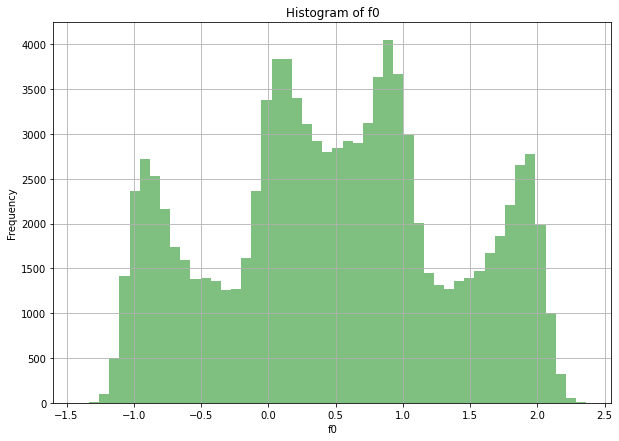

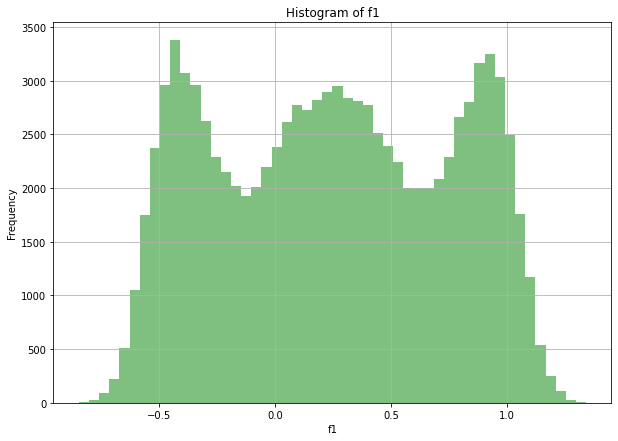

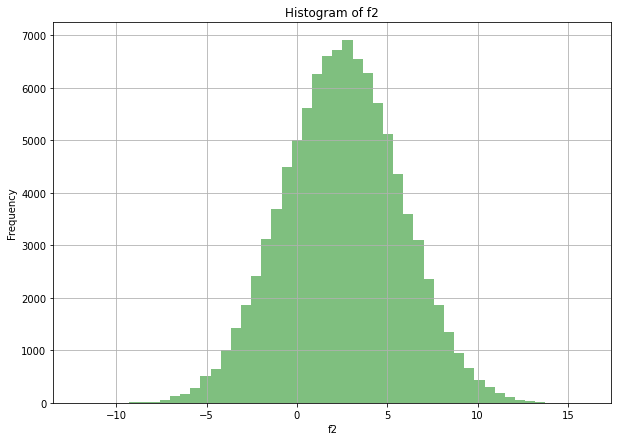

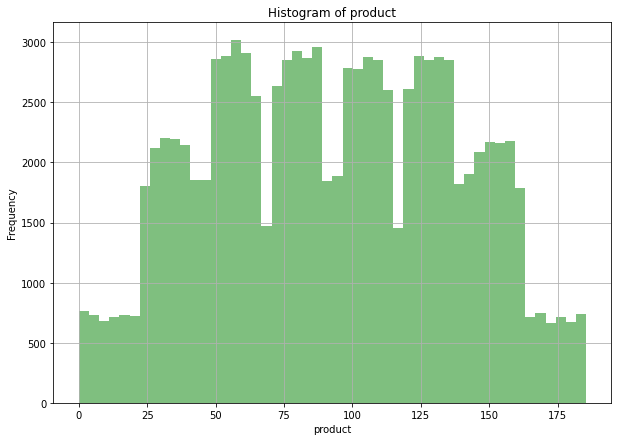

In [34]:
columns = ['f0', 'f1', 'f2', 'product']

for column in columns:
    plt.figure(figsize=(10, 7))
    plt.tight_layout()
    plt.hist(df0[column], bins=50, alpha=0.5, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [35]:
display(df1.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


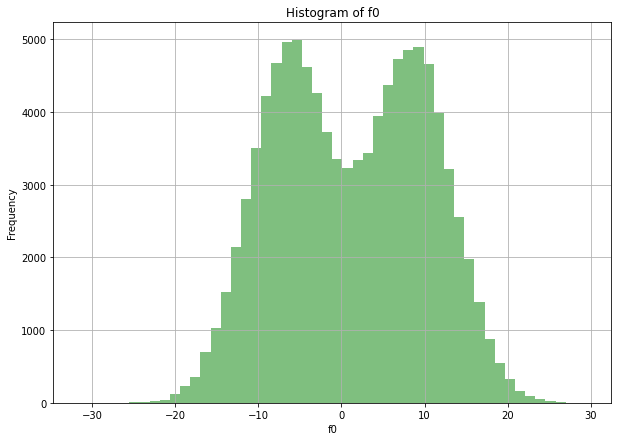

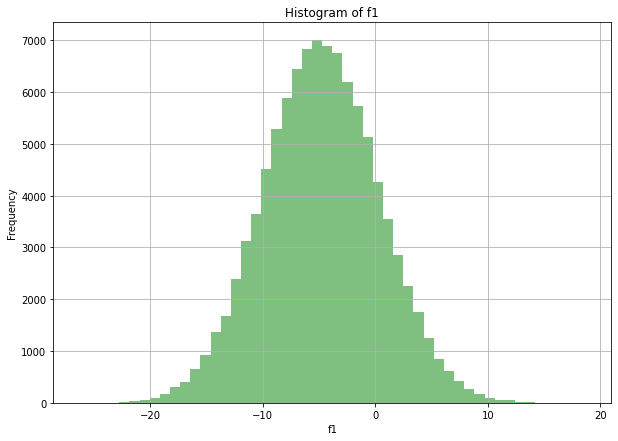

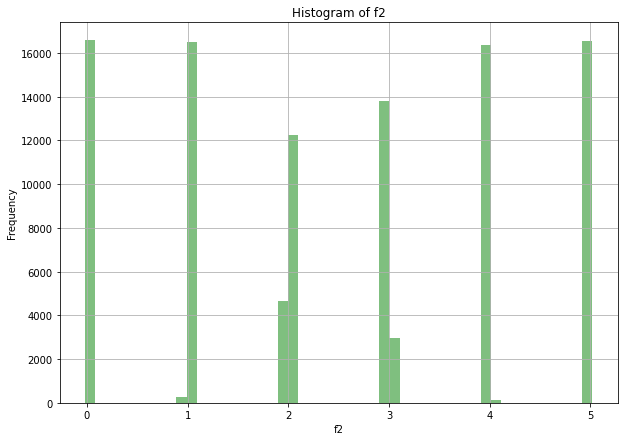

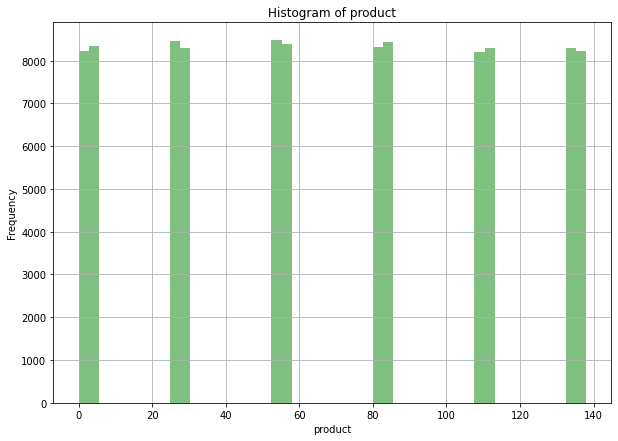

In [36]:
columns = ['f0', 'f1', 'f2', 'product']

for column in columns:
    plt.figure(figsize=(10, 7))
    plt.tight_layout()
    plt.hist(df1[column], bins=50, alpha=0.5, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

The volume of reserves (thousand barrels) in the oil well for region 1 is very less compare to region 0.

In [37]:
display(df2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


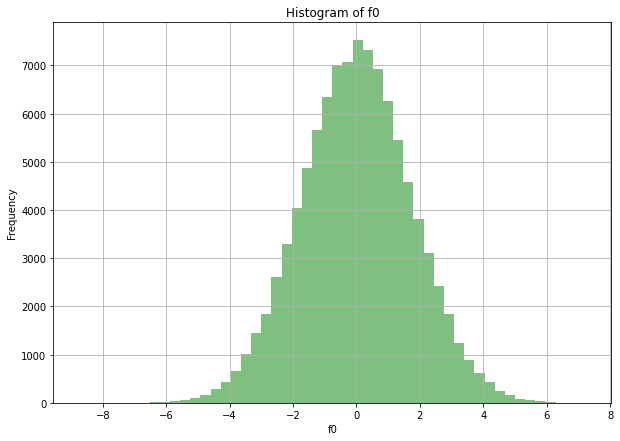

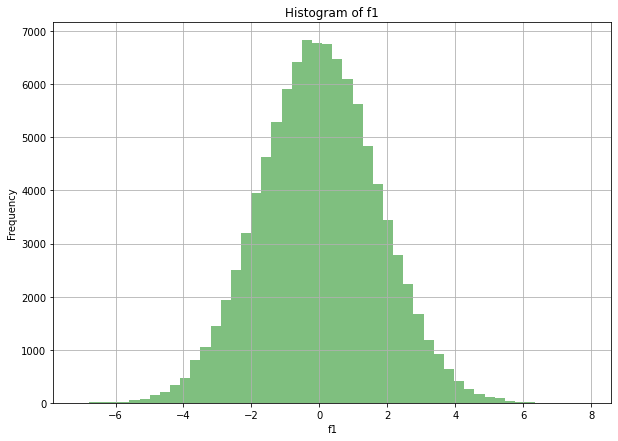

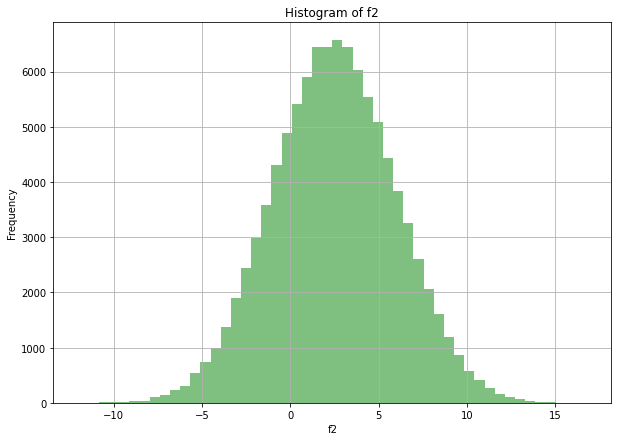

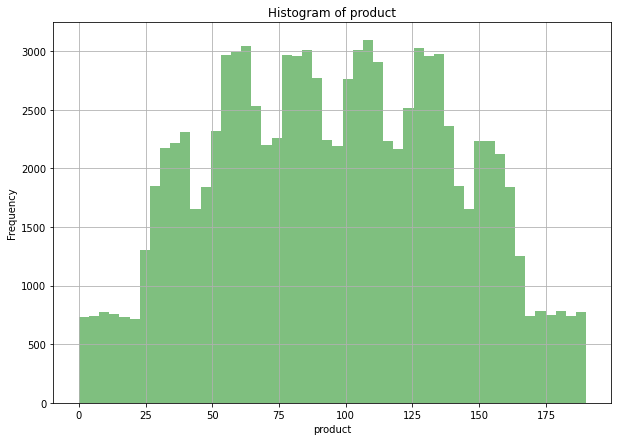

In [38]:
columns = ['f0', 'f1', 'f2', 'product']

for column in columns:
    plt.figure(figsize=(10, 7))
    plt.tight_layout()
    plt.hist(df2[column], bins=50, alpha=0.5, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

There is no anomality observed from the initial descriptive statistics.

## Train & Test the Model for Each Region

1. Split the data into a training set and validation set at a ratio of 75:25.
2. Train the model and make predictions for the validation set.
3. Save the predictions and correct answers for the validation set.
4. Print the average volume of predicted reserves and model RMSE.

In [39]:
def preprocess_data(df):
    df = df.drop(columns=['id'])
    target = df['product']
    features = df.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=24)
    return features_train, features_valid, target_train, target_valid

def train_model(features_train, target_train):
    model = LinearRegression()
    model.fit(features_train, target_train)
    return model

def evaluate_model(model, features_valid, target_valid):
    predictions_valid = model.predict(features_valid)
    rmse = round(mean_squared_error(target_valid, predictions_valid)**0.5, 2)
    avg_volume = round(predictions_valid.mean(), 2)
    return predictions_valid, rmse, avg_volume

def main(df):
    features_train, features_valid, target_train, target_valid = preprocess_data(df)
    model = train_model(features_train, target_train)
    predictions_valid, rmse, avg_volume = evaluate_model(model, features_valid, target_valid)
    return model, features_train, features_valid, target_train, target_valid, predictions_valid, rmse, avg_volume


# Train and evaluate model for each region
model_0, features_0_train, features_0_valid, target_0_train, target_0_valid, predictions_0_valid, rmse_0, avg_volume_0 = main(df0)
model_1, features_1_train, features_1_valid, target_1_train, target_1_valid, predictions_1_valid, rmse_1, avg_volume_1 = main(df1)
model_2, features_2_train, features_2_valid, target_2_train, target_2_valid, predictions_2_valid, rmse_2, avg_volume_2 = main(df2)


# Print results
print("Region 0 - Average Volume of Predicted Reserves:", avg_volume_0)
print("Region 0 - RMSE:", rmse_0)

print("Region 1 - Average Volume of Predicted Reserves:", avg_volume_1)
print("Region 1 - RMSE:", rmse_1)

print("Region 2 - Average Volume of Predicted Reserves:", avg_volume_2)
print("Region 2 - RMSE:", rmse_2)

Region 0 - Average Volume of Predicted Reserves: 92.45
Region 0 - RMSE: 37.81
Region 1 - Average Volume of Predicted Reserves: 68.41
Region 1 - RMSE: 0.89
Region 2 - Average Volume of Predicted Reserves: 94.84
Region 2 - RMSE: 40.23


1. For region 0, the average volume of predicted reserves is 92.45 thousand barrels. With RMSE 37.81, it has upper boundary volume of 130.26 thousand barrels and lower boundary volume of 54.64 thousand barrels.

2. For region 1, the average volume of predicted reserves is 68.41 thousand barrels. With RMSE 0.89, it has upper boundary volume of 69.30 thousand barrels and lower boundary volume of 67.52 thousand barrels.

3. For region 2, the average volume of predicted reserves is 94.97 thousand barrels. With RMSE 40.03, it has upper boundary volume of 135.07 thousand barrels and lower boundary volume of 54.61 thousand barrels.

Region 2 has the highest average volume of predicted reserves among 3 regions.

## Prepare for Profit Calculation

1. When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
2. The budget for development of 200 oil wells is 100 USD million.
3. One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

In [40]:
# Store all key values for calculations in separate variables

study_points = 500
selected_wells = 200
budget = 100  # in USD million
revenue_per_unit_product = 4500  # in USD, 1 unit equals to 1,000 barrels

In [41]:
# Calculate the volume of reserves sufficient for developing a new well without losses.

sufficient_reserves = round((budget * 1e6) / (revenue_per_unit_product * selected_wells), 2)
print(f"The volume of reserves sufficient for developing a new well without losses is {sufficient_reserves} thousand barrels")

The volume of reserves sufficient for developing a new well without losses is 111.11 thousand barrels


In [42]:
#Compare the obtained value with the average volume of reserves in each region.

# Findings for Region 0

if avg_volume_0 > sufficient_reserves:
    print(f"For Region 0, the average volume of reserves ({avg_volume_0}) is higher than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is sufficient for development without losses.")
else:
    print(f"For Region 0, the average volume of reserves ({avg_volume_0}) is lower than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is not sufficient for development without losses.")

    
# Findings for Region 1

if avg_volume_1 > sufficient_reserves:
    print(f"For Region 1, the average volume of reserves ({avg_volume_1}) is higher than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is sufficient for development without losses.")
else:
    print(f"For Region 1, the average volume of reserves ({avg_volume_1}) is lower than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is not sufficient for development without losses.")

    
# Findings for Region 2

if avg_volume_2 > sufficient_reserves:
    print(f"For Region 2, the average volume of reserves ({avg_volume_2}) is higher than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is sufficient for development without losses.")
else:
    print(f"For Region 2, the average volume of reserves ({avg_volume_2}) is lower than the volume of reserves sufficient ({sufficient_reserves}) for developing a new well without losses. Thus it is not sufficient for development without losses.")


For Region 0, the average volume of reserves (92.45) is lower than the volume of reserves sufficient (111.11) for developing a new well without losses. Thus it is not sufficient for development without losses.
For Region 1, the average volume of reserves (68.41) is lower than the volume of reserves sufficient (111.11) for developing a new well without losses. Thus it is not sufficient for development without losses.
For Region 2, the average volume of reserves (94.84) is lower than the volume of reserves sufficient (111.11) for developing a new well without losses. Thus it is not sufficient for development without losses.


Since region 2 showed the highest predicted average voume of reserves (94.84 thousand barrels) with RMSE of 40.03 thousand barrels, we will choose this region for further analysis, although it does not meet the volume of reserves sufficient (111.11 thousand barrels) for developing a new well without losses.

## Write a Function to Calculate Profit from a Set of Selected Oil Wells & Model Predictions

1. Pick the wells with the highest values of predictions.
2. Summarize the target volume of reserves in accordance with these predictions.
3. Suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [43]:
def calculate_profit(predictions_valid, target_valid, budget, revenue_per_unit_product, selected_wells):
    # Sort predictions in descending order
    sorted_indices = predictions_valid.argsort()[::-1]
    
    # Collect target_valid from respective indices
    selected_reserves = target_valid.iloc[sorted_indices[:selected_wells]].sum()
    
    # Select top 200 points
    top_wells_indices = sorted_indices[:selected_wells]
    
    # Calculate the revenue from selected reserves
    revenue = selected_reserves * revenue_per_unit_product
    
    # Check if the revenue covers the budget for well development
    if revenue >= (budget * 1e6):
        profit = revenue - (budget * 1e6)
        return profit, selected_reserves, revenue
    else:
        return 0, selected_reserves, revenue

# Calculate profit for each region
profit_0, selected_reserves_0, revenue_0 = calculate_profit(predictions_0_valid, target_0_valid, budget, revenue_per_unit_product, selected_wells)
profit_1, selected_reserves_1, revenue_1 = calculate_profit(predictions_1_valid, target_1_valid, budget, revenue_per_unit_product, selected_wells)
profit_2, selected_reserves_2, revenue_2 = calculate_profit(predictions_2_valid, target_2_valid, budget, revenue_per_unit_product, selected_wells)

# Print results
print(f"Region 0 - Selected Reserves: {selected_reserves_0} thousand barrels")
print(f"Region 0 - Revenue: USD {revenue_0}")
print(f"Region 0 - Profit: USD {profit_0}")

print(f"Region 1 - Selected Reserves: {selected_reserves_1} thousand barrels")
print(f"Region 1 - Revenue: USD {revenue_1}")
print(f"Region 1 - Profit: USD {profit_1}")

print(f"Region 2 - Selected Reserves: {selected_reserves_2} thousand barrels")
print(f"Region 2 - Revenue: USD {revenue_2}")
print(f"Region 2 - Profit: USD {profit_2}")


Region 0 - Selected Reserves: 29457.338152840424 thousand barrels
Region 0 - Revenue: USD 132558021.68778192
Region 0 - Profit: USD 32558021.687781915
Region 1 - Selected Reserves: 27589.081548181137 thousand barrels
Region 1 - Revenue: USD 124150866.96681511
Region 1 - Profit: USD 24150866.966815114
Region 2 - Selected Reserves: 28589.687561730487 thousand barrels
Region 2 - Revenue: USD 128653594.0277872
Region 2 - Profit: USD 28653594.027787194


Region 0 has the highest reserves of 29,457 thousand barrels and will generate potential profit of USD 32.56 million. Thus it for is suggested for oil wells' development.

## Calculate Risks & Profit for Each Region

In [44]:
from numpy.random import RandomState

state = RandomState(12345)

def profit(target, probabilities, selected_wells):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:selected_wells]
    return revenue_per_unit_product * selected.sum() - budget * 1e6

def bootstrap(target, probabilities, study_points, samples, state):
    values = []
    target = target.reset_index(drop=True)
    probabilities = probabilities.reset_index(drop=True)
    for i in range(samples):
        subsample = target.sample(n=study_points, replace=True, random_state=state)
        probs_subsample = probabilities[subsample.index]
        values.append(profit(subsample, probs_subsample, selected_wells))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = (values < 0).mean()
    return lower, upper, mean, risk


# Calculate profit for each region
lower_0, upper_0, mean_0, risk_0 = bootstrap(target_0_valid, pd.Series(predictions_0_valid), study_points, 1000, state)
lower_1, upper_1, mean_1, risk_1 = bootstrap(target_1_valid, pd.Series(predictions_1_valid), study_points, 1000, state)
lower_2, upper_2, mean_2, risk_2 = bootstrap(target_2_valid, pd.Series(predictions_2_valid), study_points, 1000, state)

# Print results
print("Region 0 - Confidence Interval:", (lower_0, upper_0))
print("Region 0 - Average Profit:", mean_0)
print("Region 0 - Risk:", risk_0 * 100, "%")

print("Region 1 - Confidence Interval:", (lower_1, upper_1))
print("Region 1 - Average Profit:", mean_1)
print("Region 1 - Risk:", risk_1 * 100, "%")

print("Region 2 - Confidence Interval:", (lower_2, upper_2))
print("Region 2 - Average Profit:", mean_2)
print("Region 2 - Risk:", risk_2 * 100, "%")



Region 0 - Confidence Interval: (-1428923.578023623, 9870607.331638258)
Region 0 - Average Profit: 4464631.815860841
Region 0 - Risk: 6.0 %
Region 1 - Confidence Interval: (153020.64074487725, 8993747.275603652)
Region 1 - Average Profit: 4846331.442995963
Region 1 - Risk: 2.0 %
Region 2 - Confidence Interval: (-1640499.635838617, 9648762.83702843)
Region 2 - Average Profit: 4220664.203038193
Region 2 - Risk: 8.1 %


Region 1 is suggested for development of oil wells as the average profit is the highest, which is around USD 4.85 million and the 95% confidence interval is ranging from 1.53 million to 8.99 million. The risk of loss is 2%.

## Conclusion

Without bootstrapping, region 0 has the highest volume of reserve of 29,457 thousand barrels and will generate potential profit of USD 32.56 million.

With bootstrapping of 1,000 samples, Region 1 is the best place for a new well development as the profit is highest among the 3 regions, which is around USD 4.85 million and the 95% confidence interval is ranging from USD 1.53 million to USD 8.99 million. The risk of loss is 2%.

The 2nd choice will be region 0 with average profit of USD 4.46 million, 95% confidence interval of USD -1.43 million and USD 9.87 million, and the risk of loss is 6.0%.

The 3rd choice will be region 2 with average profit of USD 4.22 million, 95% confidence interval of USD -1.64 million and USD 9.65 million and the risk of loss is 8.1%